# BASIC OPENCV

marco
(0, 'bread')
(1, 'milk')
(2, 'butter')


0 bread
1 milk
2 butter


100 bread
101 milk
102 butter


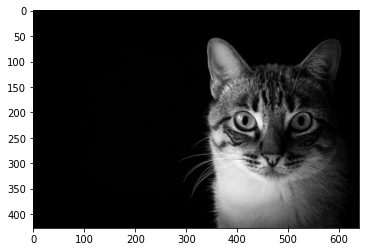

In [3]:
my_str = 'hi my name is marco'
my_name = my_str.split(" ")[4]

print(my_name)

##########################################################
grocery = ['bread', 'milk', 'butter']

for item in enumerate(grocery):
  print(item)

print('\n')

for count, item in enumerate(grocery):
  print(count, item)

print('\n')
# changing default start value
for count, item in enumerate(grocery, 100):
  print(count, item)

###########################################################
import matplotlib.pyplot as plt
import cv2 as cv

## TO READ AN IMAGE AS GRAYSCALE ====> cv.imread('IMG_PATH', 0)
img = cv.imread('Photos/cat.jpg', 0)

## TO DISPLAY IMG IN GRAYSCALE ====> plt.imshow(IMG, cmap='gray')
plt.imshow(img, cmap='gray')



READING IMAGES:

In [ ]:
# READING IMAGES:

import cv2 as cv

# LOADING AN IMAGE ===> cv.imread('PHOTO_PATH')
img = cv.imread('Photos/cat.jpg')

# TO DISPLAY AN IMAGE ===> cv.imshow('WINDOW_NAME', IMAGE_VARIABLE)
## HAVE TO FOLLOW WITH cv.waitKey(TIME_TO_WAIT)
cv.imshow('cat', img)
cv.waitKey(0)


READING VIDEOS

In [ ]:
# READING VIDEOS:

import cv2 as cv

# LOADING A VIDEO ===> cv.VideoCapture(INT_0_OR_1_OR_2) ====> TO ACCESS YOUR WEBCAM, USUALLY 0 IS THE MAIN CAM
#                 ===> cv.VideoCapture('VIDEO_PATH')    ====> TO ACCESS A VIDEO FROM STORAGE
capture = cv.VideoCapture('Videos/dog.mp4')

# THEN YOU NEED A WHILE LOOP TO READ THE VIDEO FRAME BY FRAME
while True:
    # capture.read() ===> RETURNS 2 VARS ===> isTrue: TRUE IF FRAME READ SUCCESSFULLY
    #                                    ===> frame: THE FRAME
    isTrue, frame = capture.read()

    # DISPLAY THE FRAME AS YOU WOULD AN IMAGE
    cv.imshow('Dog', frame)

    # IF THE LETTER q IS PRESSED, BREAKOUT OF THE LOOP
    if cv.waitKey(10) & 0xFF == ord('q'):
        break

# THEN YOU MUST RELEASE AND DESTROY ALL WINDOWS
capture.release()
cv.destroyAllWindows()

RESIZING AND RESCALING

In [ ]:
# RESIZING AND RESCALING FRAMES (PHOTOS, VIDEOS AND LIVE VIDEOS):
## GENERALLY IT IS GOOD PRACTICE TO RESIZE TO A SMALLER

import cv2 as cv


# THIS FUNCTION TAKES THE FRAME AND THE REQ SCALE (0.75 BY DEFAULT) AND RETURNS THE NEW RESCALED FRAME
def rescale_frame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)

    # cv.resize(FRAME, DIMENSIONS_AS_A_TUPLE, INTERPOLATION_METHOD)
    ## INTER_NEAREST – a nearest-neighbor interpolation
    ## INTER_LINEAR – a bilinear interpolation (used by default)            <========= BETTER FOR RESIZING TO LARGER
    ## INTER_AREA – resampling using pixel area relation.                   <========= BETTER FOR RESIZING TO SMALLER
    #               It may be a preferred method for image decimation, as it gives moire’-free results. 
    #                  But when the image is zoomed, it is similar to theINTER_NEAREST method.
    ## INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood    <========= BETTER FOR RESIZING TO LARGER, SLOWER BUT HIGHER QUALITY
    ## INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood

    return cv.resize(frame, dimensions, interpolation = cv.INTER_AREA)

# rescaled_img = cv.resize(img, (int(frame.shape[1] * scale), int(frame.shape[0] * scale)), interpolation=cv.INTER_AREA)

img = cv.imread('Photos/cat_large.jpg')

cv.imshow('large cat', img)
cv.imshow('resized large cat', rescale_frame(img, 0.25))

cv.waitKey(0)


In [ ]:
# RESIZING FOR LIVE VIDEOS ONLY:

import cv2 as cv

capture = cv.VideoCapture(0)

# capture.set(INT_FROM_0_TO_18, VALUE) ===>
## 0. CV_CAP_PROP_POS_MSEC Current position of the video file in milliseconds.
## 1. CV_CAP_PROP_POS_FRAMES 0-based index of the frame to be decoded/captured next.
## 2. CV_CAP_PROP_POS_AVI_RATIO Relative position of the video file
## 3. CV_CAP_PROP_FRAME_WIDTH Width of the frames in the video stream.    <====================
## 4. CV_CAP_PROP_FRAME_HEIGHT Height of the frames in the video stream.  <====================
## 5. CV_CAP_PROP_FPS Frame rate.
## 6. CV_CAP_PROP_FOURCC 4-character code of codec.
## 7. CV_CAP_PROP_FRAME_COUNT Number of frames in the video file.
## 8. CV_CAP_PROP_FORMAT Format of the Mat objects returned by retrieve() .
## 9. CV_CAP_PROP_MODE Backend-specific value indicating the current capture mode.
## 10. CV_CAP_PROP_BRIGHTNESS Brightness of the image (only for cameras).
## 11. CV_CAP_PROP_CONTRAST Contrast of the image (only for cameras).
## 12. CV_CAP_PROP_SATURATION Saturation of the image (only for cameras).
## 13. CV_CAP_PROP_HUE Hue of the image (only for cameras).
## 14. CV_CAP_PROP_GAIN Gain of the image (only for cameras).
## 15. CV_CAP_PROP_EXPOSURE Exposure (only for cameras).
## 16. CV_CAP_PROP_CONVERT_RGB Boolean flags indicating whether images should be converted to RGB.
## 17. CV_CAP_PROP_WHITE_BALANCE Currently unsupported
## 18. CV_CAP_PROP_RECTIFICATION Rectification flag for stereo cameras (note: only supported by DC1394 v 2.x backend currently)

def change_res(width, height):
    capture.set(3,width)
    capture.set(4,height)


while True:

    change_res(300, 400)

    isTrue, frame = capture.read()
    
    cv.imshow('LIVE VID', frame)

    if cv.waitKey(0) & 0xFF == ord('q'):
        break

capture.release()
cv.destroyAllWindows()

DRAWING SHAPES AND WRITING TEXT

In [1]:
import cv2 as cv
import numpy as np

img = cv.imread('Photos/cat.jpg')

##########################################################################################

# TO DRAW A LINE:
     ## cv.line(IMAGE_TO_DRAW_ON, (POINT_1_TUPLE), (POINT_2_TUPLE), (LINE_COLOUR_TUPLE), THICKNESS_OPTIONAL)

cv.line(img, (500,0), (200,200), (255,255,255), thickness = 20)

##########################################################################################

# TO DRAW A RECTANGLE:
    ## cv.rectangle(IMAGE_TO_DRAW_ON, (TOP_LEFT_CORNER_TUPLE), (BOTTOM_RIGHT_CORNER_TUPLE), (LINE_COLOUR_TUPLE), THICKNESS_OPTIONAL)
    ## TO FILL THE SHAPE WITH COLOUR ===> thickness = cv.FILLED OR thickness = -1

cv.rectangle(img, (250,0), (500,250), (0,255,0), thickness = 4)

    ## IN THIS EXAMPLE, WE ARE DRAWING A BLANK RECTANGLE FROM ORIGIN TO MID X AND Y OF THE IMAGE 
    ## NOTICE THAT THE RECTANGLE HEIGHT IS HALF THE # OF ROWS AND VICE VERSA

cv.rectangle(img, (0,0), (img.shape[1]//2, img.shape[0]//2), (255,0,0), thickness = -1)

##########################################################################################

# TO DRAW A CIRCLE:
    ## cv.circle(IMAGE_TO_DRAW_ON, (CENTRE_TUPLE), RADIUS, (LINE_COLOUR_TUPLE), THICKNESS_OPTIONAL)

cv.circle(img, (300,300), 40, (255,150,255), thickness = 3)

##########################################################################################

# WRITING TEXT:
    ## cv.putText(IMAGE_TO_DRAW_ON, "TEXT", (ORIGIN_TUPLE), FONT, SIZE, (COLOUR_TUPLE), THICKNESS_OPTIONAL)
    ## NOTICE THE ORIGIN IS THE BOTTOM LEFT CORNER
    ## FONTS START WITH cv.FONT_SOMETHING...

cv.putText(img, "Hello", (img.shape[1]//2,img.shape[0]//2), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0), thickness = 2)

##########################################################################################

cv.imshow('cat with shapes and text', img)

cv.waitKey(0)

CREATING AND CHANGING SOLID COLOUR IMAGE

In [ ]:
import cv2 as cv
import numpy as np

## np.zeros((HEIGHT , WIDTH, 3_FOR_BGR), dtype='uint8')
blank = np.zeros((500,500,3), dtype='uint8')

# CHANGE SOME PIXELS TO RED:
## REMEMBER IT IS BGR
## REMEMBER ORIGIN IS TOP LEFT CORNER
blank[:,:] = 0,255,0

# CHANGE A PART OF THE IMAGE:
blank[200:300, 300:400] = 255,0,0

cv.imshow('solid color', blank)
cv.waitKey(0)

ESSENTIAL FUNCTIONS:
- CONVERTING TO GRAYSCALE
- BLURRING
- EDGE CASCADING
- DILATING
- EROSION

In [ ]:
# CONVERTING AN IMAGE TO GRAYSCALE:
## USEFUL FOR DETECTING EDGES

import cv2 as cv
import numpy as np

img = cv.imread('Photos/cat.jpg')

## cv.cvtColor(SOURCE_IMAGE, cv.COLOR_BGR2GRAY)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# cv.imshow('Gray', gray)

# cv.waitKey(0)

############################################################
# BLURRING AN IMAGE:
## USEFUL FOR REMOVING SOME OF THE NOISE (BAD LIGHTING, BAD CAMERA SENSOR)

# FOR GAUSSIAN BLUR (SMOOTHING):
## cv.GaussianBlur(SOURCE_IMAGE, (KERNEL_SIZE_TUPLE), BORDER_TYPE)
### KERNEL_SIZE_TUPLE ===> (HEIGHT, WIDTH) ===> ODD NUMBERS ===> BIGGER SIZE === HIGHER BLUR
### BORDER_TYPE ====> cv.BORDER_DEFAULT
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)

# cv.imshow('src and blur images', np.hstack((img, blur)))

############################################################
# EDGE CASCADING:
## FINDS EDGES IN AN IMAGE

# CANNY EDGE CASCADING:
## need two threshold values, minVal and maxVal. 
## Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. 
## Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. 
## If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded

canny_src = cv.Canny(img, 125, 175)

cv.imshow('Canny from source', canny_src)

# SIMPLE THRESHOLDING
## cv.threshold(SRC_IMG, THRESHOLD, MAX_VAL, THRESHOLDING_TYPE)
## IF PIXEL > THRESHOLD, PIXEL = MAX_VAL
## IF PIXEL < THRESHOLD, PIXEL = 0
## RETURNS THE USED THRESHOLD AND THE THRESHOLDED IMG
ret, thresh = cv.threshold(img, 125, 255, cv.THRESH_BINARY)

cv.imshow('Thresholded', thresh)

# TO REDUCE THE NUMBER OF EDGES, USED A BLURRED IMAGE
canny_blur = cv.Canny(blur, 125, 175)
cv.imshow('Canny from blur', canny_blur)

############################################################
# DILATING AN IMAGE USING A STRUCTURE:
## ADDS PIXELS TO THE BOUNDARIES (EDGES) OF AN IMAGE X EROSION AND REMOVED HOLES, GAPS AND GULFS:
## BETTER USED WITH EDGE-CASCADED IMAGE

# cv.dilate(SOURCE_IMAGE, (KERNEL_SIZE_TUPLE), #_OF_ITERATIONS)
dilated = cv.dilate(img, (3,3), iterations=5)

cv.imshow('Dilated', dilated)

############################################################
# EROSION:
# REMOVES PIXELS FROM IMAGE BOUNDARIES (EDGES) X DILATING:

eroded = cv.erode(img, (7,7), iterations=5)

# RUNNING cv.erode ON A DILATED IMAGE IDEALLY RETURNS THE ORIGINAL IMAGE (OR STRUCTURE)

cv.imshow('Eroded', eroded)

cv.waitKey(0)
cv.destroyAllWindows()

MORPHOLOGICAL IMAGE TRANSFORMATIONS:
- TRANSLATION
- ROTATION
- AFFINE TRANSFORMATION
- PERSPECTIVE TRANSFORMATION
- RESIZING
- FLIPPING
- CROPPING

In [ ]:
import cv2 as cv
import numpy as np

img = cv.imread('Photos/park.jpg')

############################################################
# TRANSLATION
## cv.warpAffine(SOURCE_IMAGE, TRANSLATION_MATRIX, (OUTPUT_W_H_TUPLE))
### TRANSLATION_MATRIX ===> np.float32([[1,0,X],[0,1,Y]]) ===> A 2*3 MATRIX ===> REGULAR TRANSLATION
#### -X ===> LEFT SHIFT
#### -Y ===> UP SHIFT

def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])

    return cv.warpAffine(img, transMat, (img.shape[1], img.shape[0]))

translated_img = translate(img, 100, 100)

# cv.imshow("translated image", translated_img)

############################################################
# ROTATION
## cv.warpAffine(SOURCE_IMAGE, ROTATION_MATRIX, (OUTPUT_W_H_TUPLE))
### ROTATION_MATRIX ===> cv.getRotationMatrix2D((ROTATION_CENTRE_TUPLE), ANGLE, SCALE)
#### TO ROTATE AN IMAGE AROUND ITS CENTRE ===> ROTATION_CENTRE_TUPLE = (COLS//2, ROWS//2)
#### - ANGLE ===> CLOCKWISE ROTATION

def rotate(img, angle, rotCentre=None):

    if rotCentre is None:
        # ROTATE AROUND CENTRE
        rotCentre = (img.shape[1]//2, img.shape[0]//2)

    rotMat = cv.getRotationMatrix2D(rotCentre, angle, 1.0)

    return cv.warpAffine(img, rotMat, (img.shape[1], img.shape[0]))

rotated_img = rotate(img, 90)

# cv.imshow("rotated image", rotated_img)


############################################################
# AFFINE TRANSFORMATION
## cv.warpAffine(SOURCE_IMAGE, TRANSFORMATION_MATRIX, (OUTPUT_W_H_TUPLE))
### TRANSFORMATION_MATRIX ===> cv.getAffineTransform([3_COORDINATES_SRC], [3_COORDINATES_TARGET])
#### 3_COORDINATES_SRC ===> np.float32([[XS_1,YS_1],[XS_2,YS_2],[XS_3,YS_3]])
#### 3_COORDINATES_TARGET ===> np.float32([[XT_1,YT_1],[XT_2,YT_2],[XT_3,YT_3]])

def affine_transform(img, src_pts, tgt_pts):
    rows, cols = img.shape[:2]
    transMat = cv.getAffineTransform(np.float32(src_pts), np.float32(tgt_pts))
    return cv.warpAffine(img, transMat, (cols, rows))

src_pts = [[50,50],[200,50],[50,200]]
tgt_pts = [[10,100],[200,50],[100,250]]

transformed_img = affine_transform(img, src_pts, tgt_pts)

cv.imshow("transformed image", transformed_img)

############################################################
# PERSPECTIVE TRANSFORMATION
# USEFUL FOR SCANNING A DOCUMENT WITH PHONE CAMERA
##  cv.warpPerspective(SOURCE_IMAGE, PERSPECTIVE_MATRIX, (OUTPUT_W_H_TUPLE))
### PERSPECTIVE_MATRIX ===> cv.getPerspectiveTransform([4_COORDINATES_SRC], [4_COORDINATES_TARGET])
#### 4_COORDINATES_SRC ===> np.float32([[XS_1,YS_1],[XS_2,YS_2],[XS_3,YS_3], [XS_4,YS_4]])
#### 4_COORDINATES_TARGET ===> np.float32([[XT_1,YT_1],[XT_2,YT_2],[XT_3,YT_3], [XT_4,YT_4]])
#### 3 OF THE 4 POINTS CANNOT BE COLLINEAR

def perspective_transform(img, src_pts, tgt_pts):
    rows, cols = img.shape[:2]
    transMAt = cv.getPerspectiveTransform(np.float32(src_pts), np.float32(tgt_pts))
    return cv.warpPerspective(img, transMAt, (cols, rows))

src_pts = [[56,65],[368,52],[28,387],[389,390]]
tgt_pts = [[0,300],[300,0],[0,300],[300,300]]

transformed_img = perspective_transform(img, src_pts, tgt_pts)

cv.imshow("perspective transformed image", transformed_img)

############################################################
# RESIZING

# BELOW WE NEGLECT THE ASPECT RATION
resized = cv.resize(img, (500,500))

############################################################
# FLIPPING
# cv.flip(SOURCE_IMAGE, FLIP_CODE_0_1_-1)
## 0 ===> VERTICALLY ===> AROUND X AXIS
## 1 ===> HORIZONTALLY ===> AROUND Y AXIS
## -1 ===> BOTH

flipped_img = cv.flip(img, 1)

# cv.imshow("flipped image", flipped_img)

############################################################
# CROPPING (SLICING)

cropped = img[50:200, 200:400]

cv.waitKey(0)
cv.destroyAllWindows()

CONTOUR DETECTION

CONTOURS != EDGES

For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.

In [ ]:
import cv2 as cv
import numpy as np

img = cv.imread('Photos/cats.jpg')

blur_img = cv.GaussianBlur(img, (5, 5), cv.BORDER_DEFAULT)

gray_img = cv.cvtColor(blur_img,cv.COLOR_BGR2GRAY)

# BINARISING WITH CANNY
canny = cv.Canny(gray_img, 125, 175)

# BINARISING WITH THRESHOLD
ret, thresh = cv.threshold(gray_img, 125, 255, cv.THRESH_BINARY)

# TO FIND CONTOURS
## cv.findContours(SRC_IMG, CONTOUR_RETRIEVAL_MODE, CONTOUR_APPROXIMATION_METHOD)

contours_canny, hierarchies_canny = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
contours_thresh, hierarchies_thresh = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# TO DRAW A CONTOUR, YOU NEED A IMG TO DRAW IT ON
blank1 = np.ones(img.shape, dtype='uint8')
blank2 = np.ones(img.shape, dtype='uint8')

# cv.drawContours(IMG_TO_DRAW_ON, CONTOUR, #_OF_CONTOURS, LINE_COLOUR, LINE_THICKNESS)
cv.drawContours(blank1, contours_canny, -1, (0,0,255), 1)
cv.drawContours(blank2, contours_thresh, -1, (0,0,255), 1)

cv.imshow("Contours canny", blank1)
cv.imshow("Contours thresh", blank2)

cv.waitKey(0)
cv.destroyAllWindows()

COLOR SPACES:

BGR, GREYSCALE, HSV & LAB

NOTE THAT OPENCV USES BGR NOT RGB BY DEFAULT

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Photos/cats.jpg')
cv.imshow("SOURCE", img)


# BGR TO GRAY
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("GRAY", gray)

# BGR TO HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow("HSV", hsv)

# BGR TO LAB
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow("LAB", lab)

# BGR TO RGB
## NOTE THAT IF YOU OPEN AN IMAGE WITH MATPLOTLIB, IT READS IT IN RGB (INVERSE OF BGR)
## plt.imshow(img)
## plt.show
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow("RGB", rgb)
## YOU WILL NOTICE THAT rgb IS INVERTED IN OPENCV BUT IF YOU OPEN IT WITH MATPLOTLIB, IT WILL BE CORRECT

# WE CAN CONVERT GREYSCALE, RGB, HSV AND LAB TO BGR
# WE CANNOT CONVERT GREYSCALE, RGB, HSV AND LAB TO GREYSCALE, RGB, HSV AND LAB DIRECTLY:
hsv_bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
bgr_gray = cv.cvtColor(hsv_bgr, cv.COLOR_BGR2GRAY)

cv.waitKey(0)
cv.destroyAllWindows()

COLOUR CHANNELS

SPLIT AN IMAGE INTO ITS COLOUR CHANNELS

BLUE AREAS IN SRC IMAGES WILL BE WHITE IN THE BLUE IMG
AREAS WITH NO BLUE WILL BE DARK

In [1]:
import cv2 as cv
import numpy as np

img = cv.imread('Photos/park.jpg')

# TO SPLIT AN IMAGE:
b, g, r = cv.split(img)

cv.imshow("b", b)
cv.imshow("g", g)
cv.imshow("r", r)

# TO MERGE CHANNELS TO ITS SRC:
src = cv.merge([b,g,r])

# TO DISPLAY B, G, R WITH THEIR TRUE COLOURS:
# PUT ZEROES IN ALL OTHER CHANNELS
blank = np.zeros(img.shape[:2], dtype= 'uint8')

true_b = cv.merge([b, blank, blank])
true_g = cv.merge([blank, g, blank])
true_r = cv.merge([blank, blank, r])

cv.imshow("true_b", b)
cv.imshow("true_g", g)
cv.imshow("true_r", r)


cv.waitKey(0)
cv.destroyAllWindows()

BLURRING
- AVERAGING
- GAUSSIAN
- MEDIAN
- BILATERAL FILTERING

In [5]:
import cv2 as cv

img = cv.imread('Photos/park.jpg')

# AVERAGING

## cv.blur(SRC_IMG, (KERNEL_SIZE_TUPLE))
## HIGHER KERNEL SIZE ===> HIGHER BLUR
avg = cv.blur(img, (3,3))

cv.imshow('avg', avg)

###################################################################################

# GAUSSIAN BLUR (AVERAGING WITH WEIGHTS)
## TENDS TO APPEAR MORE NATURAL, REMOVES GAUSSIAN NOISE

## cv.GaussianBlur(SRC_IMG, (KERNEL_SIZE_TUPLE), STD_DEV_X, STD_DEV_Y)
## IF STD_DEV_Y IS NOT SPECIFIED, IT IS SET TO = STD_DEV_X
gauss = cv.GaussianBlur(img, (3,3), 0)

cv.imshow('gauss', gauss)

###################################################################################

# MEDIAN BLURRING
## REMOVES THE MOST NOISE, PREFERABLE WITH SMALL KERNELS
## SIMILAR TO AVERAGING, BUT USES MEDIAN INSTEAD OF AVG

## cv.medianBlur(SRC_IMG, KERNEL_DIAMETER_INT)
median = cv.medianBlur(img, 3)

cv.imshow('median', median)

###################################################################################

# BILATERAL BLURRING
## MOST EFFECTIVE, RETAINS EDGES

## cv.bilateralFilter(SRC_IMG, DIAMETER_INT, SIGMA_COLOUR, SIGMA_SPACE)
## HIGHER SIGMA_COLOUR  ==> MORE COLOURS TO BE TAKEN INTO CONSIDERATION
## SIGMA_SPACE ===> HOW FAR PIXELS TO INFLUENCE THE BLURRED PIXEL
bilateral = cv.bilateralFilter(img, 10, 35, 25)

cv.imshow('bilateral', bilateral)

cv.waitKey(0)
cv.destroyAllWindows()

BITWISE OPERATIONS

In [2]:
import cv2 as cv
import numpy as np

blank = np.zeros((400,400), dtype = "uint8")

rect = cv.rectangle(blank.copy(), (30, 30), (370, 370), 255, -1)
circ = cv.circle(blank.copy(), (200, 200), 200, 255, -1)

# BITWISE AND
## INTERSECTING FEATURES
bitwise_and = cv.bitwise_and(rect, circ)

# BITWISE OR
## INTERSECTING AND NON-INTERSECTING FEATURES
bitwise_or = cv.bitwise_or(rect, circ)

# BITWISE XOR
##  NON-INTERSECTING FEATURES
bitwise_xor = cv.bitwise_xor(rect, circ)

# BITWISE NOT
# INVERTS THE PIXELS OF A SHAPE
bitwise_not = cv.bitwise_not(rect)

cv.imshow('rect', rect)
cv.imshow('circ', circ)
cv.imshow('bitwise_and', bitwise_and)
cv.imshow('bitwise_or', bitwise_or)
cv.imshow('bitwise_xor', bitwise_xor)
cv.imshow('bitwise_not', bitwise_not)


cv.waitKey(0)
cv.destroyAllWindows()

MASKING

MASK SIZE HAS TO = SRC_IMG SIZE

In [1]:
import cv2 as cv
import numpy as np

img = cv.imread('Photos/cats.jpg')

blank = np.zeros(img.shape[:2], dtype = 'uint8')

# NOTE THAT THE COLOR IN THIS CIRCLE IS ONLY ONE CHANNEL SET TO 255
mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)

# cv.bitwise_and(SRC_IMG, SRC_IMG, mask = MASK)
masked_img = cv.bitwise_and(img, img, mask = mask)

cv.imshow('masked img',masked_img)


cv.waitKey(0)
cv.destroyAllWindows()

COMPUTING HISTOGRAMS:

HISTOGRAMS FOR PIXEL INTENSITIES:

HOW MANY PIXELS AT EACH PIXEL INTENSITY

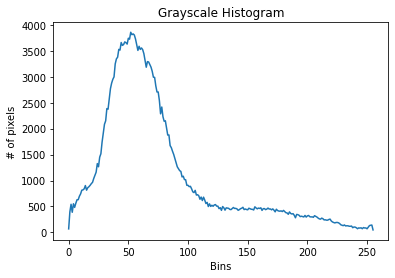

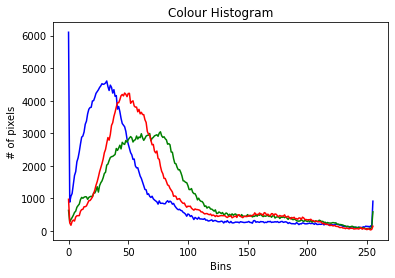

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Photos/cats.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# GRAYSCALE HISTOGRAM
# cv.calcHist([SRC_IMGS], [NO_OF_COLOR_CHANNELS], MASK, [NO_OF_BINS], [RANGE_OF_ALL_POSSIBLE_PIXEL_VALUES])
## MASK ===> IF YOU ONLY WANT THE HISTOGRAM FOR A PORTION OF AN IMG
## NO_OF_BINS ===> THE # OF PIXEL INTENSITY BINS

gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
# plt.xlim([0, 256])
plt.show()

# COLOUR HISTOGRAM
colours = ('b', 'g', 'r')

plt.figure()
plt.title('Colour Histogram')

for i, colour in enumerate(colours):

    color_hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(color_hist, color = colour)

plt.xlabel('Bins')
plt.ylabel('# of pixels')
# plt.xlim([0, 256])
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

THRESHOLDING

In [16]:
import cv2 as cv

img = cv.imread('Photos/cats.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# SIMPLE THRESHOLDING
# SPECIFY A THRESHOLD ACROSS THE ENTIRE IMG
## threshold, thresh = cv.threshold(GRAY_IMG, THRESHOLD_VAL, VALUE_IF_OVER, THRESHOLDING_TYPE)
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
cv.imshow('simple threshold', thresh)

threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)
cv.imshow('simple threshold inv', thresh_inv)


# ADAPTIVE THRESHOLDING
## USES A KERNEL TO FIND THE THRESHOLD VALUE FOR EACH PIXEL
## adaptive_thresh = cv.adaptiveThreshold(GRAY_IMG, VALUE_IF_OVER, ADAPTIVE_THRESHOLDING_TYPE, THRESHOLDING_TYPE, KERNEL_SIZE, C)
## KERNEL_SIZE === BLOCK SIZE
## C ===> A VALUE THAT IS SUBTRACTED FROM THE MEAN/ GAUSSIAN TO FINE TUNE IT
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 3)

cv.imshow('adaptive threshold', adaptive_thresh)

cv.waitKey(0)
cv.destroyAllWindows()

GRADIENTS

DETECTING EDGES

CANNY IS VERY CLEAN

In [1]:
import cv2 as cv
import numpy as np

img = cv.imread('Photos/cats.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# LAPLACIAN
## LOOKS LIKE A PENCIL SHADING OF THE IMG
## cv.Laplacian(GRAY_IMG, D_DEPTH)
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))

cv.imshow('Laplacian', lap)

# SOBEL
## OBTAINS THE GRADIENTS IN THE X AND Y DIRECTION SEPARATELY
## cv.Sobel(GRAY_IMG, D_DEPTH, D_X, D_Y)
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)

sobelxy = cv.bitwise_or(sobelx, sobely)

cv.imshow('SOBEL X', sobelx)
cv.imshow('SOBEL Y', sobely)
cv.imshow('SOBEL COMBINED', sobelxy)

# CANNY
## INCLUDES SOBEL IN ITS HIDDEN STEPS
canny = cv.Canny(gray, 150, 175) 

cv.imshow('CANNY', canny)

cv.waitKey(0)
cv.destroyAllWindows()